<a href="https://colab.research.google.com/github/nxxk23/BasicProg_DataViz65/blob/main/%5Bdata_prep%5D_file_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import File Google Sheets

In [32]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [33]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error as MAPE

###Home

In [34]:
home = pd.read_excel(f'https://docs.google.com/spreadsheets/d/17Z0qVeXHI_vl6m_kPjICy7id7eVaAejWYQ-kUt0kiVg/export?format=xlsx', sheet_name ='บ้าน')
h1 = home[home['ID ผู้ประเมิน']==1]
h1 = h1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
h2 = home[home['ID ผู้ประเมิน']==2]
h2 = h2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
h1MAPE = MAPE(h1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(h1['ราคาทรัพย์']))
h2MAPE = MAPE(h2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(h2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {h1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {h2MAPE*100:.2f}%')
h2['ประเมิน1'] = h2['post id'].map(h1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
h2_h = h2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(h2_h['ประเมินราคาซื้อ-ขาย'],h2_h['ประเมิน1'])
two2one = MAPE(h2_h['ประเมิน1'],h2_h['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(h2_h)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 14.50%
นักประเมิน คนที่ 2 = 11.14%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 14.56%
จำนวนทรัพย์ทั้งหมด 498 ทรัพย์


In [35]:
home = h2_h[['post id','ราคาทรัพย์','ประเมิน1', 'ประเมินราคาซื้อ-ขาย']]
home.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน2'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


##Land

In [36]:
land = pd.read_excel(f'https://docs.google.com/spreadsheets/d/17Z0qVeXHI_vl6m_kPjICy7id7eVaAejWYQ-kUt0kiVg/export?format=xlsx', sheet_name ='land')
l1 = land[land['ID ผู้ประเมิน']==1]
l1 = l1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
l2 = land[land['ID ผู้ประเมิน']==2]
l2 = l2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
l1MAPE = MAPE(l1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(l1['ราคาทรัพย์']))
l2MAPE = MAPE(l2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(l2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {l1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {l2MAPE*100:.2f}%')
l2['ประเมิน1'] = l2['post id'].map(l1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
l2_l = l2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(l2_l['ประเมินราคาซื้อ-ขาย'],l2_l['ประเมิน1'])
two2one = MAPE(l2_l['ประเมิน1'],l2_l['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(l2_l)} ทรัพย์')
land = l2_l[['post id','ราคาทรัพย์','ประเมิน1', 'ประเมินราคาซื้อ-ขาย']]
land.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน2'},inplace=True)

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


##Townhome

In [37]:
th = pd.read_excel(f'https://docs.google.com/spreadsheets/d/17Z0qVeXHI_vl6m_kPjICy7id7eVaAejWYQ-kUt0kiVg/export?format=xlsx', sheet_name ='ทาวน์โฮม')
t1 = th[th['ID ผู้ประเมิน']==1]
t1 = t1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
t2 = th[th['ID ผู้ประเมิน']==2]
t2 = t2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
t1MAPE = MAPE(t1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(t1['ราคาทรัพย์']))
t2MAPE = MAPE(t2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(t2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {t1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {t2MAPE*100:.2f}%')
t2['ประเมิน1'] = t2['post id'].map(t1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
t2_t = t2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(t2_t['ประเมินราคาซื้อ-ขาย'],t2_t['ประเมิน1'])
two2one = MAPE(t2_t['ประเมิน1'],t2_t['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(t2_t)} ทรัพย์')
th = t2_t[['post id','ราคาทรัพย์','ประเมิน1', 'ประเมินราคาซื้อ-ขาย']]
th.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน2'},inplace=True)

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


##Commercial building

In [38]:
build = pd.read_excel(f'https://docs.google.com/spreadsheets/d/17Z0qVeXHI_vl6m_kPjICy7id7eVaAejWYQ-kUt0kiVg/export?format=xlsx', sheet_name ='อาคารพาณิชย์')
b1 = build[build['ID ผู้ประเมิน']==1]
b1 = b1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
b2 = build[build['ID ผู้ประเมิน']==2]
b2 = b2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
b1MAPE = MAPE(b1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(b1['ราคาทรัพย์']))
b2MAPE = MAPE(b2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(b2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {b1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {b2MAPE*100:.2f}%')
b2['ประเมิน1'] = b2['post id'].map(b1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
b2_b = b2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(b2_b['ประเมินราคาซื้อ-ขาย'],b2_b['ประเมิน1'])
two2one = MAPE(b2_b['ประเมิน1'],b2_b['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(b2_b)} ทรัพย์')
b = b2_b[['post id','ราคาทรัพย์','ประเมิน1', 'ประเมินราคาซื้อ-ขาย']]
b.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน2'},inplace=True)

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 20.25%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 12.53%
จำนวนทรัพย์ทั้งหมด 91 ทรัพย์


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# HW2 
แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

In [39]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

##Home

In [40]:
home['check1']=home.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
home['check2']=home.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
check1 = list()
for row in home.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
home['check1'] = check1

check2 = list()
for row in home.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
home['check2'] = check2

home

<ipython-input-40-d4f4036b0cd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['check1']=home.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-40-d4f4036b0cd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['check2']=home.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
<ipython-input-40-d4f4036b0cd5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,1.156000,1.070370
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,1.210000,1.487603
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,1.147541,1.220000
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,1.694915,1.016949
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,1.025000,1.230000


In [41]:
home.sort_values(by=['check1'],ascending=False)  # ตัด 802

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
228,https://nayoo.co/khonkaen/posts/525,1933000,830000.0,2200000.0,2.328916,1.138127
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
767,https://nayoo.co/khonkaen/posts/2321,465000,900000.0,400000.0,1.935484,1.162500
...,...,...,...,...,...,...
266,https://nayoo.co/khonkaen/posts/585,3300000,3300000.0,3500000.0,1.000000,1.060606
63,https://nayoo.co/khonkaen/posts/2033,1200000,1200000.0,1000000.0,1.000000,1.200000
652,https://nayoo.co/khonkaen/posts/2256,2000000,2000000.0,2200000.0,1.000000,1.100000
43,https://nayoo.co/khonkaen/posts/1128,4200000,4200000.0,5000000.0,1.000000,1.190476


In [42]:
home.sort_values(by=['check2'],ascending=False) #ตัด 802 / ลด 0 544 /ลด 0 292

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
544,https://nayoo.co/khonkaen/posts/1619,2850000,2500000.0,29000000.0,1.140000,10.175439
292,https://nayoo.co/khonkaen/posts/622,8019000,7900000.0,80000000.0,1.015063,9.976306
75,https://nayoo.co/khonkaen/posts/1,390000,600000.0,1300000.0,1.538462,3.333333
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
...,...,...,...,...,...,...
806,https://nayoo.co/khonkaen/posts/3210,2390000,2500000.0,2390000.0,1.046025,1.000000
169,https://nayoo.co/khonkaen/posts/11264,6500000,5600000.0,6500000.0,1.160714,1.000000
763,https://nayoo.co/khonkaen/posts/2319,1200000,1200000.0,1200000.0,1.000000,1.000000
1149,https://nayoo.co/khonkaen/posts/6096,2200000,2200000.0,2200000.0,1.000000,1.000000


##Land

In [43]:
land['check1']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
land['check2']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
check1 = list()
for row in land.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
land['check1'] = check1

check2 = list()
for row in land.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
land['check2'] = check2

land

<ipython-input-43-3e4316ec3602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land['check1']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-43-3e4316ec3602>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land['check2']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
<ipython-input-43-3e4316ec3602>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556,1.400000
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,1.862500,1.241667
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,1.857143,1.083333
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,1.363636,1.200000
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,1.325000,1.060000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


In [44]:
land.sort_values(by=['check1'],ascending=False) # 194 เติม 0 /112 ลด 0 /47,58 ตัด

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
100,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
122,https://nayoo.co/khonkaen/posts/12762,650000,650000.0,700000.0,1.000000,1.076923


In [45]:
land.sort_values(by=['check2'],ascending=False)  # 47,58 ตัด / 148 ลด 0/188 ลด 0

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
158,https://nayoo.co/khonkaen/posts/6732,3500000,2800000.0,3500000.0,1.250000,1.000000


##Townhome

In [46]:
th['check1']=th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
th['check2']=th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
check1 = list()
for row in th.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
th['check1'] = check1

check2 = list()
for row in th.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
th['check2'] = check2

th

<ipython-input-46-a14a42651373>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th['check1']=th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-46-a14a42651373>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th['check2']=th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
<ipython-input-46-a14a42651373>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0,1.105000,1.085973
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0,1.041667,1.180556
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0,1.118750,1.052941


In [47]:
th.sort_values(by=['check1'],ascending=False) #ตัด 176

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
216,https://nayoo.co/khonkaen/posts/17535,840000,1300000.0,1000000.0,1.547619,1.190476
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
...,...,...,...,...,...,...
162,https://nayoo.co/khonkaen/posts/2242,1610000,1600000.0,1600000.0,1.006250,1.006250
228,https://nayoo.co/khonkaen/posts/17923,1990000,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000,2500000.0,2300000.0,1.004016,1.082609
200,https://nayoo.co/khonkaen/posts/13411,3200000,3200000.0,3200000.0,1.000000,1.000000


In [48]:
th.sort_values(by=['check2'],ascending=False) 

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,2850000,2800000.0,1500000.0,1.017857,1.900000
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
...,...,...,...,...,...,...
202,https://nayoo.co/khonkaen/posts/15111,2200000,2500000.0,2200000.0,1.136364,1.000000
209,https://nayoo.co/khonkaen/posts/17511,1700000,1500000.0,1700000.0,1.133333,1.000000
212,https://nayoo.co/khonkaen/posts/17516,1800000,1700000.0,1800000.0,1.058824,1.000000
213,https://nayoo.co/khonkaen/posts/17518,1200000,1100000.0,1200000.0,1.090909,1.000000


##Commercial Building

In [49]:
b['check1']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
b['check2']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
check1 = list()
for row in b.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
b['check1'] = check1

check2 = list()
for row in b.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน2']))
b['check2'] = check2

b

<ipython-input-49-ff0a554fec3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['check1']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-49-ff0a554fec3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['check2']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
<ipython-input-49-ff0a554fec3f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0,1.100000,1.212121
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0,1.052632,1.052632
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
...,...,...,...,...,...,...
183,https://nayoo.co/khonkaen/posts/6168,2652000,3000000.0,2700000.0,1.131222,1.018100
185,https://nayoo.co/khonkaen/posts/6169,3851000,3800000.0,4000000.0,1.013421,1.038691
187,https://nayoo.co/khonkaen/posts/6176,3410000,3200000.0,3500000.0,1.065625,1.026393
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0,1.083333,1.025641


In [50]:
b.sort_values(by=['check1'],ascending=False) 

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
169,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
81,https://nayoo.co/khonkaen/posts/701,1925000,2700000.0,2000000.0,1.402597,1.038961
...,...,...,...,...,...,...
61,https://nayoo.co/khonkaen/posts/643,4180000,4200000.0,4200000.0,1.004785,1.004785
65,https://nayoo.co/khonkaen/posts/651,2200000,2200000.0,2000000.0,1.000000,1.100000
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
177,https://nayoo.co/khonkaen/posts/6123,2200000,2200000.0,2200000.0,1.000000,1.000000


In [51]:
b.sort_values(by=['check2'],ascending=False) 

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
163,https://nayoo.co/khonkaen/posts/6009,2250000,2700000.0,5000000.0,1.200000,2.222222
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
49,https://nayoo.co/khonkaen/posts/602,2520000,3300000.0,3500000.0,1.309524,1.388889
169,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
...,...,...,...,...,...,...
121,https://nayoo.co/khonkaen/posts/2180,5000000,4000000.0,5000000.0,1.250000,1.000000
109,https://nayoo.co/khonkaen/posts/1885,3500000,3400000.0,3500000.0,1.029412,1.000000
107,https://nayoo.co/khonkaen/posts/1858,1500000,2000000.0,1500000.0,1.333333,1.000000
101,https://nayoo.co/khonkaen/posts/1614,2500000,2700000.0,2500000.0,1.080000,1.000000


### Retake MAPE

####Home

In [52]:
Home = pd.read_excel(f'https://docs.google.com/spreadsheets/d/13oWup4M1rh5Cq4RMIvoc5d9Oe59DZS0w/export?format=xlsx', sheet_name ='บ้าน')
h1 = Home[Home['ID ผู้ประเมิน']==1]
h1 = h1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
h2 = Home[Home['ID ผู้ประเมิน']==2]
h2 = h2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
h1MAPE = MAPE(h1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(h1['ราคาทรัพย์']))
h2MAPE = MAPE(h2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(h2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {h1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {h2MAPE*100:.2f}%')
h2['ประเมิน1'] = h2['post id'].map(h1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
h2_h = h2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(h2_h['ประเมินราคาซื้อ-ขาย'],h2_h['ประเมิน1'])
two2one = MAPE(h2_h['ประเมิน1'],h2_h['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(h2_h)} ทรัพย์')
home = h2_h[['post id','ราคาทรัพย์','ประเมิน1', 'ประเมินราคาซื้อ-ขาย','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
home.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน2'},inplace=True)

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 12.97%
นักประเมิน คนที่ 2 = 8.82%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 12.45%
จำนวนทรัพย์ทั้งหมด 497 ทรัพย์


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


####Land

In [53]:
Land = pd.read_excel(f'https://docs.google.com/spreadsheets/d/13oWup4M1rh5Cq4RMIvoc5d9Oe59DZS0w/export?format=xlsx', sheet_name ='Land')
l1 = Land[Land['ID ผู้ประเมิน']==1]
l1 = l1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
l2 = Land[Land['ID ผู้ประเมิน']==2]
l2 = l2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
l1MAPE = MAPE(l1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(l1['ราคาทรัพย์']))
l2MAPE = MAPE(l2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(l2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {l1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {l2MAPE*100:.2f}%')
l2['ประเมิน1'] = l2['post id'].map(l1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
l2_l = l2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(l2_l['ประเมินราคาซื้อ-ขาย'],l2_l['ประเมิน1'])
two2one = MAPE(l2_l['ประเมิน1'],l2_l['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(l2_l)} ทรัพย์')
land = l2_l[['post id','ราคาทรัพย์','ประเมิน1', 'ประเมินราคาซื้อ-ขาย','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
land.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน2'},inplace=True)

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 45.13%
นักประเมิน คนที่ 2 = 19.89%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 32.23%
จำนวนทรัพย์ทั้งหมด 98 ทรัพย์


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


####Townhome

In [54]:
Th = pd.read_excel(f'https://docs.google.com/spreadsheets/d/13oWup4M1rh5Cq4RMIvoc5d9Oe59DZS0w/export?format=xlsx', sheet_name ='ทาวน์โฮม')
t1 = Th[Th['ID ผู้ประเมิน']==1]
t1 = t1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
t2 = Th[Th['ID ผู้ประเมิน']==2]
t2 = t2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
t1MAPE = MAPE(t1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(t1['ราคาทรัพย์']))
t2MAPE = MAPE(t2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(t2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {t1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {t2MAPE*100:.2f}%')
t2['ประเมิน1'] = t2['post id'].map(t1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
t2_t = t2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(t2_t['ประเมินราคาซื้อ-ขาย'],t2_t['ประเมิน1'])
two2one = MAPE(t2_t['ประเมิน1'],t2_t['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(t2_t)} ทรัพย์')
th = t2_t[['post id','ราคาทรัพย์','ประเมิน1', 'ประเมินราคาซื้อ-ขาย','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
th.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน2'},inplace=True)

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 10.97%
นักประเมิน คนที่ 2 = 8.54%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 10.89%
จำนวนทรัพย์ทั้งหมด 119 ทรัพย์


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


####Commercial Building

In [55]:
Build = pd.read_excel(f'https://docs.google.com/spreadsheets/d/13oWup4M1rh5Cq4RMIvoc5d9Oe59DZS0w/export?format=xlsx', sheet_name ='อาคารพาณิชย์')
b1 = Build[Build['ID ผู้ประเมิน']==1]
b1 = b1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
b2 = Build[Build['ID ผู้ประเมิน']==2]
b2 = b2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
b1MAPE = MAPE(b1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(b1['ราคาทรัพย์']))
b2MAPE = MAPE(b2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(b2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {b1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {b2MAPE*100:.2f}%')
b2['ประเมิน1'] = b2['post id'].map(b1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
b2_b = b2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(b2_b['ประเมินราคาซื้อ-ขาย'],b2_b['ประเมิน1'])
two2one = MAPE(b2_b['ประเมิน1'],b2_b['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(b2_b)} ทรัพย์')
b = b2_b[['post id','ราคาทรัพย์','ประเมิน1', 'ประเมินราคาซื้อ-ขาย','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']]
b.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมิน2'},inplace=True)

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 20.25%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 12.53%
จำนวนทรัพย์ทั้งหมด 91 ทรัพย์


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


#HW3 
Visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน) - ความมั่นใจ - ให้คะแนนทรัพย์

##Trend
ดูแนวโน้มระหว่างราคาทรัพย์และการประเมินราคา

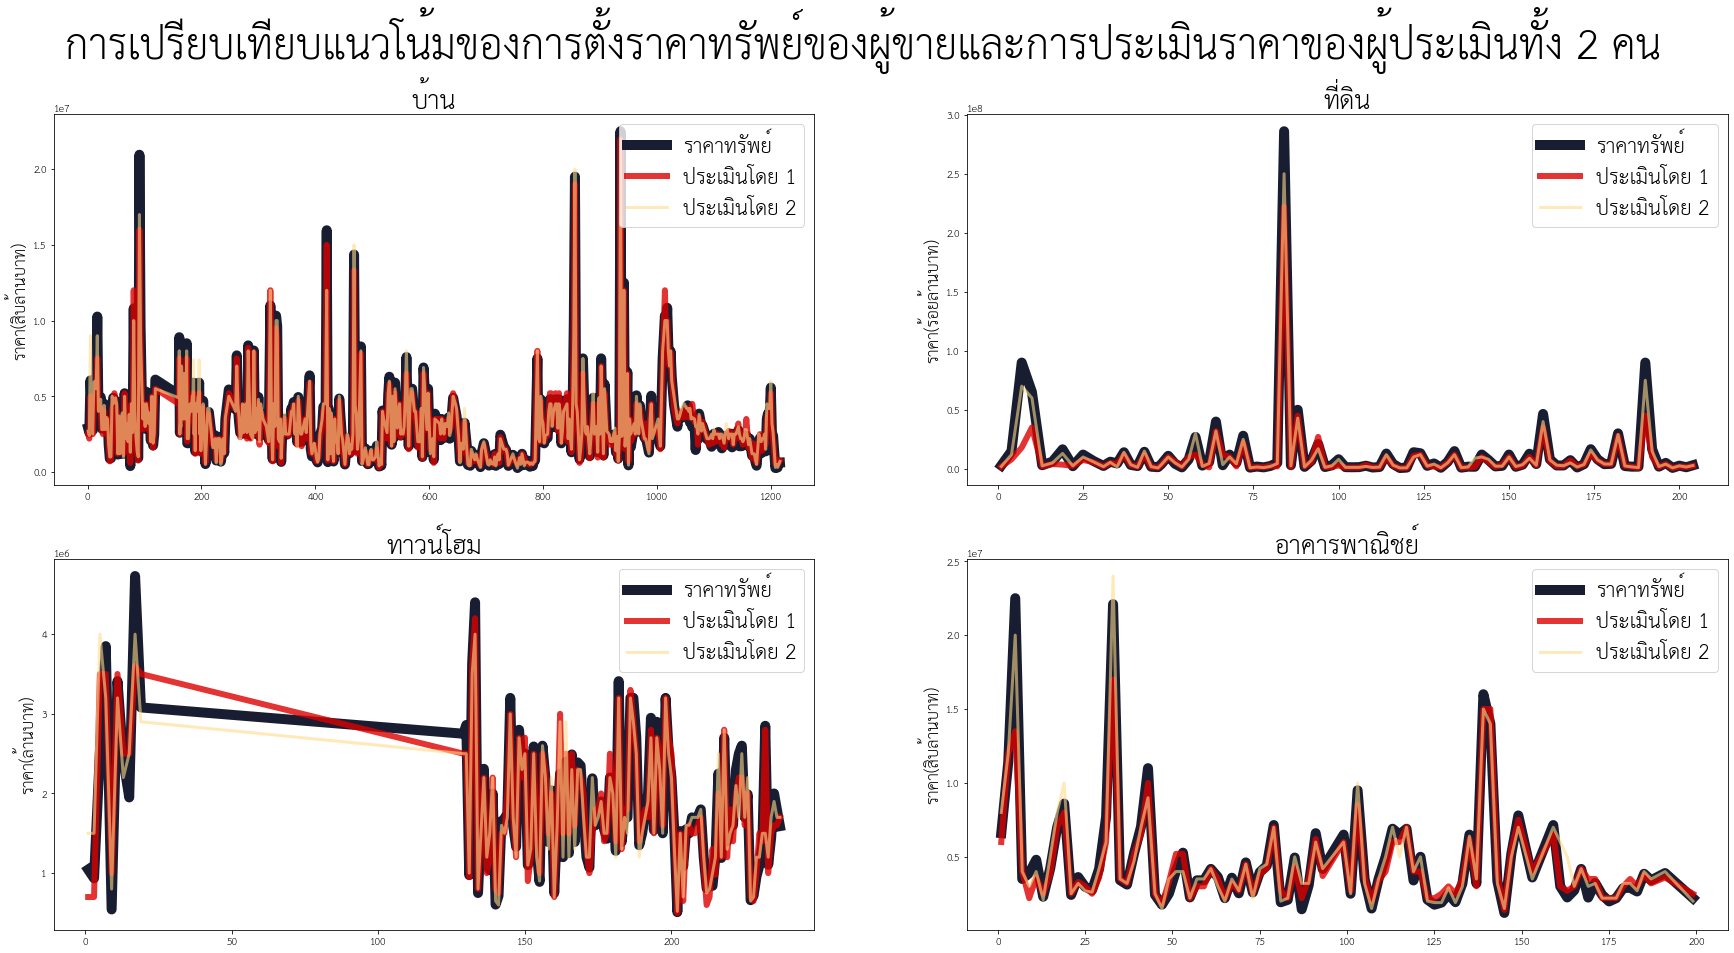

In [56]:
mpl.rcParams['figure.figsize']=[30,15]
plt.suptitle('การเปรียบเทียบแนวโน้มของการตั้งราคาทรัพย์ของผู้ขายและการประเมินราคาของผู้ประเมินทั้ง 2 คน',fontsize = 40)

plt.subplot(2,2,1)
plt.plot(home['ราคาทรัพย์'], color = "#181D31", linewidth = '10',label = 'ราคาทรัพย์')
plt.plot(home['ประเมิน1'], color = "#DC0000", alpha = 0.8,linewidth = '6',label = 'ประเมินโดย 1')
plt.plot(home['ประเมิน2'], color = "#FFDB89" ,alpha = 0.6,linewidth = '3',label = 'ประเมินโดย 2')
plt.title('บ้าน',fontsize=25)
plt.ylabel('ราคา(สิบล้านบาท)',fontsize=16)
plt.legend(loc='upper right' ,fontsize = 20,)#ให้คำอธิบายตรงกรอบโชว์ออกมา() #ให้คำอธิบายตรงกรอบโชว์ออกมา


plt.subplot(2,2,2)
plt.plot(land['ราคาทรัพย์'], color = "#181D31", linewidth = '10',label = 'ราคาทรัพย์')
plt.plot(land['ประเมิน1'], color = "#DC0000", alpha = 0.8,linewidth = '6',label = 'ประเมินโดย 1')
plt.plot(land['ประเมิน2'], color = "#FFDB89" ,alpha = 0.6,linewidth = '3',label = 'ประเมินโดย 2')
plt.title('ที่ดิน',fontsize=25)
plt.ylabel('ราคา(ร้อยล้านบาท)',fontsize=16)
plt.legend(loc='upper right' ,fontsize = 20)#ให้คำอธิบายตรงกรอบโชว์ออกมา() #ให้คำอธิบายตรงกรอบโชว์ออกมา


plt.subplot(2,2,3)
plt.plot(th['ราคาทรัพย์'], color = "#181D31", linewidth = '10',label = 'ราคาทรัพย์')
plt.plot(th['ประเมิน1'], color = "#DC0000", alpha = 0.8,linewidth = '6',label = 'ประเมินโดย 1')
plt.plot(th['ประเมิน2'], color = "#FFDB89" ,alpha = 0.6,linewidth = '3',label = 'ประเมินโดย 2')
plt.title('ทาวน์โฮม',fontsize=25)
plt.ylabel('ราคา(ล้านบาท)',fontsize=16)
plt.legend(loc='upper right' ,fontsize = 20)#ให้คำอธิบายตรงกรอบโชว์ออกมา() #ให้คำอธิบายตรงกรอบโชว์ออกมา

plt.subplot(2,2,4)
plt.plot(b['ราคาทรัพย์'], color = "#181D31", linewidth = '10',label = 'ราคาทรัพย์')
plt.plot(b['ประเมิน1'], color = "#DC0000", alpha = 0.8,linewidth = '6',label = 'ประเมินโดย 1')
plt.plot(b['ประเมิน2'], color = "#FFDB89" ,alpha = 0.6,linewidth = '3',label = 'ประเมินโดย 2')
plt.title('อาคารพาณิชย์',fontsize=25)
plt.ylabel('ราคา(สิบล้านบาท)',fontsize=16)
plt.legend(loc='upper right' ,fontsize = 20)#ให้คำอธิบายตรงกรอบโชว์ออกมา() #ให้คำอธิบายตรงกรอบโชว์ออกมา
plt.show()

##Correlation

In [68]:
home.corr().style.background_gradient(cmap="OrRd")


,ราคาทรัพย์,ประเมิน1,ประเมิน2
ราคาทรัพย์,1.000000,0.984497,0.985156
ประเมิน1,0.984497,1.000000,0.980612
ประเมิน2,0.985156,0.980612,1.000000


In [69]:
land.corr().style.background_gradient(cmap="OrRd")

,ราคาทรัพย์,ประเมิน1,ประเมิน2
ราคาทรัพย์,1.000000,0.966168,0.998291
ประเมิน1,0.966168,1.000000,0.970916
ประเมิน2,0.998291,0.970916,1.000000


In [70]:
th.corr().style.background_gradient(cmap="OrRd")

,ราคาทรัพย์,ประเมิน1,ประเมิน2
ราคาทรัพย์,1.000000,0.951368,0.940824
ประเมิน1,0.951368,1.000000,0.946121
ประเมิน2,0.940824,0.946121,1.000000


In [71]:
b.corr().style.background_gradient(cmap="OrRd")

,ราคาทรัพย์,ประเมิน1,ประเมิน2
ราคาทรัพย์,1.000000,0.961883,0.978076
ประเมิน1,0.961883,1.000000,0.954673
ประเมิน2,0.978076,0.954673,1.000000


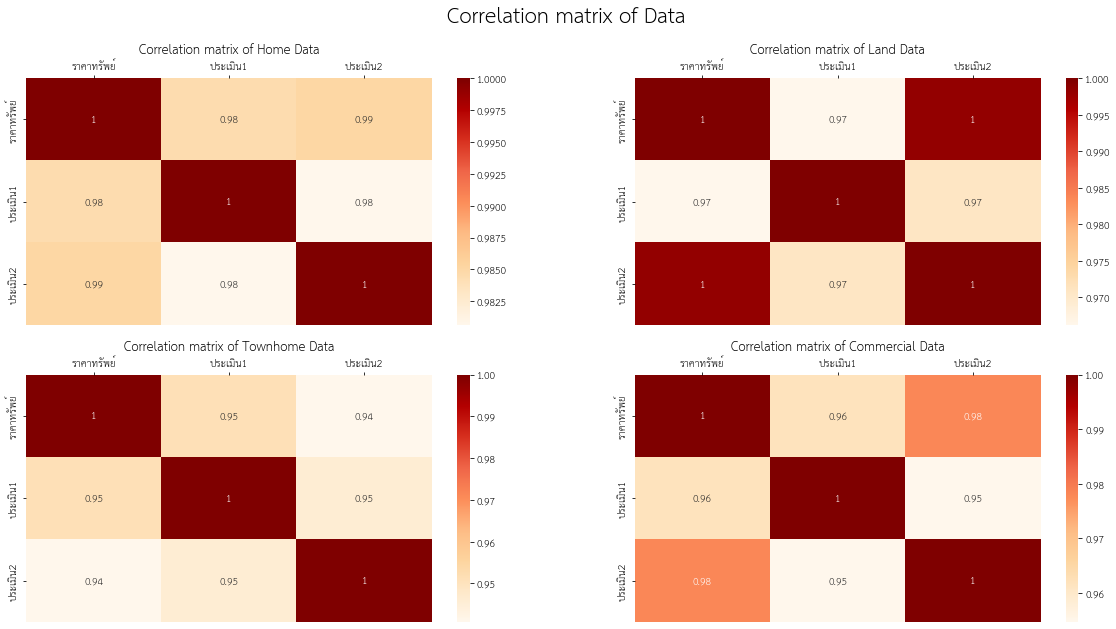

In [57]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 10))
fig.suptitle('Correlation matrix of Data',fontsize = 20)

sns.heatmap(home.corr(),annot = True,cmap = "OrRd", ax=ax[0,0]).xaxis.tick_top() #.xaxis.tick_top() = ให้ชื่อแกน x ขึ้นไปอยู๋ ด้านบน
ax[0,0].set_title('Correlation matrix of Home Data')

sns.heatmap(land.corr(), cmap = "OrRd", annot=True, ax=ax[0,1]).xaxis.tick_top()
ax[0,1].set_title('Correlation matrix of Land Data')

sns.heatmap(th.corr(), cmap = "OrRd", annot=True, ax=ax[1,0]).xaxis.tick_top()
ax[1,0].set_title('Correlation matrix of Townhome Data')

sns.heatmap(b.corr(), cmap = "OrRd", annot=True, ax=ax[1,1]).xaxis.tick_top()
ax[1,1].set_title('Correlation matrix of Commercial Data')

plt.show()

##Compare 
ความมั่นใจในการประเมินทรัพย์ของผู้ประเมินทั้ง 2 คน

In [59]:
HC = Home.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
LC = Land.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
TC = Th.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
CC = Build.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])

HC = HC.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
LC = LC.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
TC = TC.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
CC = CC.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()

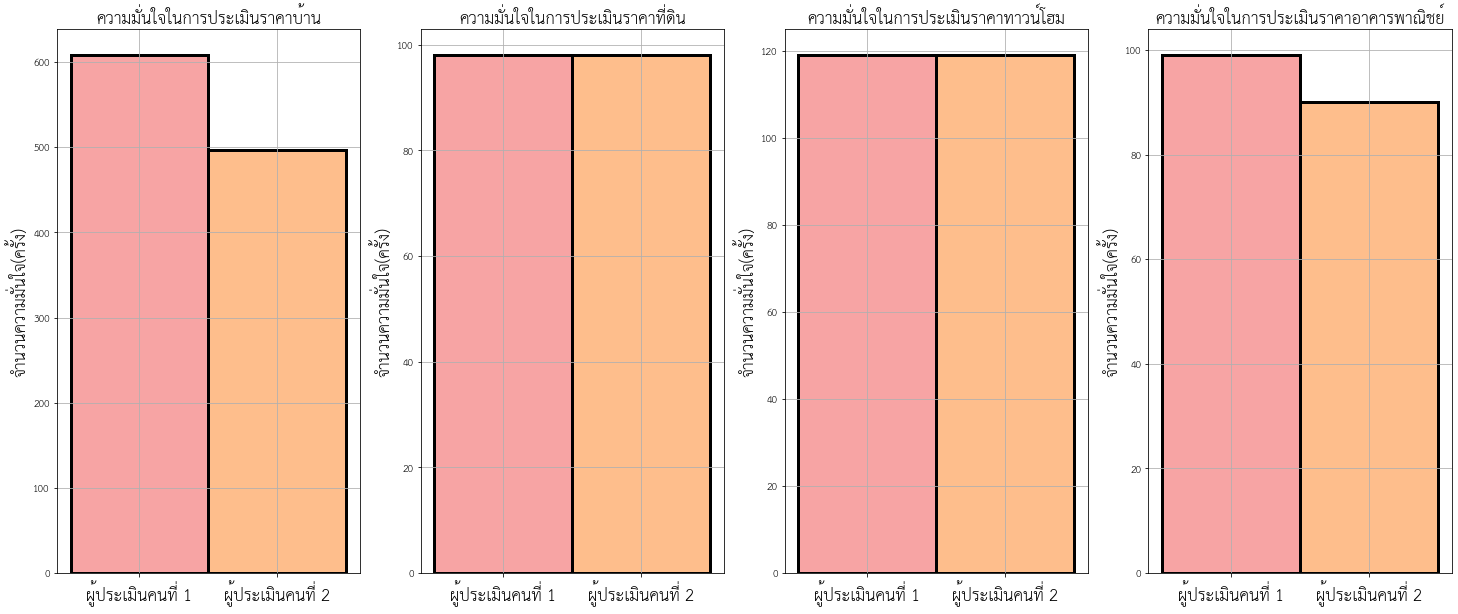

In [60]:
mpl.rcParams['figure.figsize']=[25,10]

plt.subplot(1,4,1)
plt.bar([1,1.5],HC['ความมั่นใจในการเมินราคาทรัพย์'],ec="#000000", color=['#F7A4A4','#FEBE8C'],width=0.5,linewidth = 3) #เปลี่ยนสี เเท่งกราฟ
plt.xticks([1,1.5],['ผู้ประเมินคนที่ 1','ผู้ประเมินคนที่ 2'],fontsize=16)
plt.title('ความมั่นใจในการประเมินราคาบ้าน',fontsize=16)
plt.grid(True)
plt.ylabel('จำนวนความมั่นใจ(ครั้ง)',fontsize=16);

plt.subplot(1,4,2)
LC = LC.iloc[:2,]
plt.bar([1,1.5],LC['ความมั่นใจในการเมินราคาทรัพย์'],ec="#000000", color=['#F7A4A4','#FEBE8C'],width=0.5,linewidth = 3) #เปลี่ยนสี เเท่งกราฟ
plt.xticks([1,1.5],['ผู้ประเมินคนที่ 1','ผู้ประเมินคนที่ 2'],fontsize=16)
plt.title('ความมั่นใจในการประเมินราคาที่ดิน',fontsize=16)
plt.grid(True)
plt.ylabel('จำนวนความมั่นใจ(ครั้ง)',fontsize=16);

plt.subplot(1,4,3)
plt.bar([1,1.5],TC['ความมั่นใจในการเมินราคาทรัพย์'],ec="#000000", color=['#F7A4A4','#FEBE8C'],width=0.5,linewidth = 3) #เปลี่ยนสี เเท่งกราฟ
plt.xticks([1,1.5],['ผู้ประเมินคนที่ 1','ผู้ประเมินคนที่ 2'],fontsize=16)
plt.title('ความมั่นใจในการประเมินราคาทาวน์โฮม',fontsize=16)
plt.grid(True)
plt.ylabel('จำนวนความมั่นใจ(ครั้ง)',fontsize=16);

plt.subplot(1,4,4)
plt.bar([1,1.5],CC['ความมั่นใจในการเมินราคาทรัพย์'],ec="#000000", color=['#F7A4A4','#FEBE8C'],width=0.5,linewidth = 3) #เปลี่ยนสี เเท่งกราฟ
plt.xticks([1,1.5],['ผู้ประเมินคนที่ 1','ผู้ประเมินคนที่ 2'],fontsize=16)
plt.title('ความมั่นใจในการประเมินราคาอาคารพาณิชย์',fontsize=16)
plt.grid(True)
plt.ylabel('จำนวนความมั่นใจ(ครั้ง)',fontsize=16)
plt.show();

#Pair Plot : Scatter

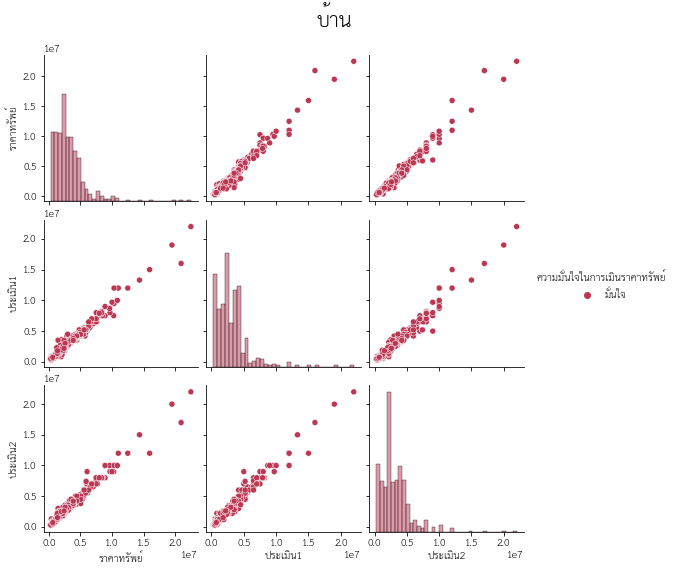

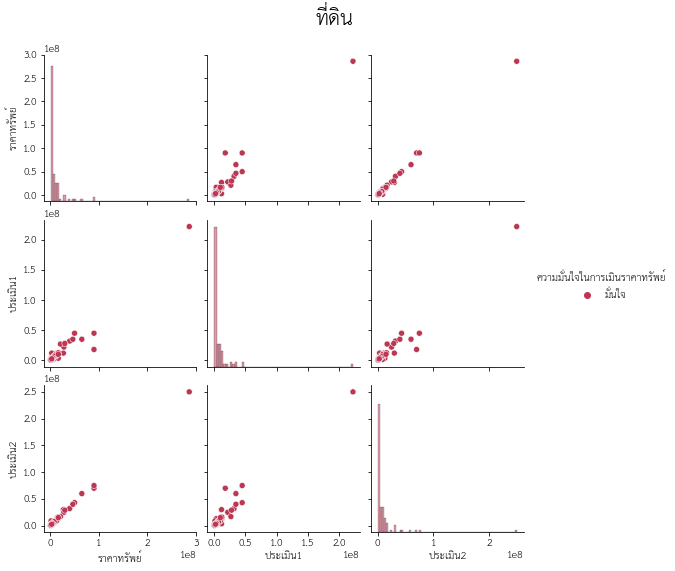

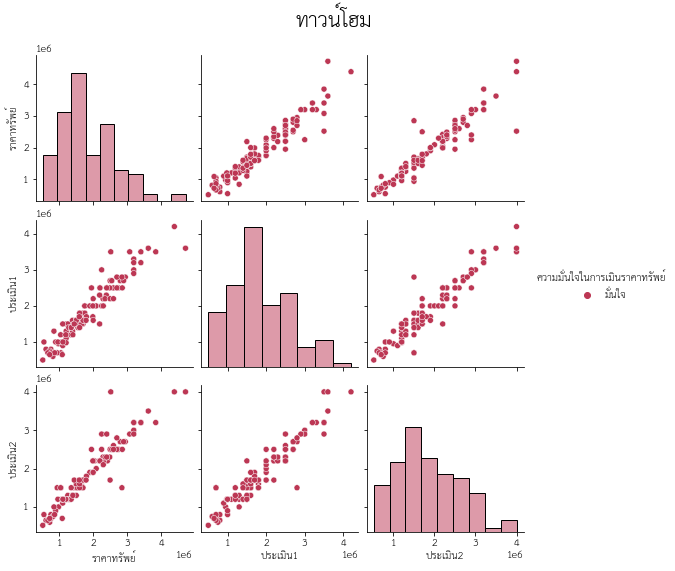

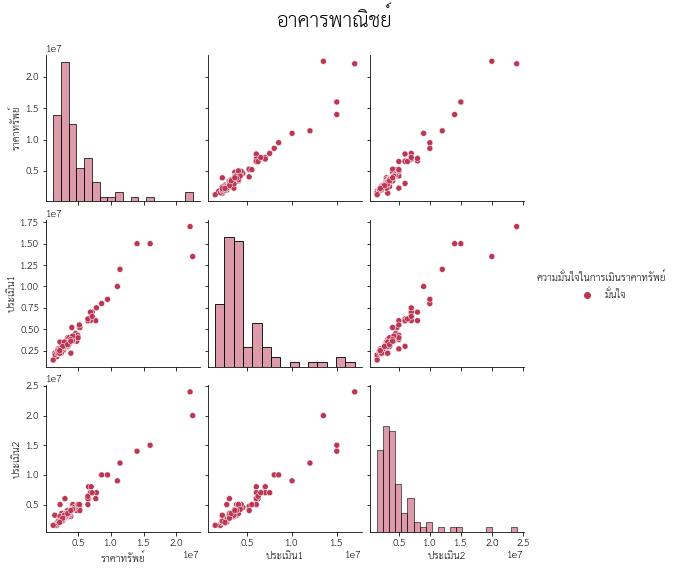

In [61]:
#pairplot ข้อมูลผ่านการ Normalization เพื่อปรับให้อยู่ใน standard เดียวกันและพล็อตจุดข้อมูลเพื่อดูการกระจาย
sns.pairplot(home, hue ="ความมั่นใจในการเมินราคาทรัพย์",palette = "inferno", diag_kind="hist")# ,kind='reg',plot_kws={'line_kws':{'color':'red'}} เพิ่มเส้นตรงที่เเดง reg
plt.suptitle("บ้าน",fontsize = 20 ,y = 1.05)


sns.pairplot(land, hue ="ความมั่นใจในการเมินราคาทรัพย์",palette = "inferno", diag_kind="hist")
plt.suptitle("ที่ดิน",fontsize = 20,y = 1.05 )


sns.pairplot(th, hue ="ความมั่นใจในการเมินราคาทรัพย์",palette = "inferno", diag_kind="hist")
plt.suptitle("ทาวน์โฮม",fontsize = 20,y = 1.05 )


sns.pairplot(b, hue ="ความมั่นใจในการเมินราคาทรัพย์",palette = "inferno", diag_kind="hist")
plt.suptitle("อาคารพาณิชย์",fontsize = 20,y = 1.05 )

plt.show();

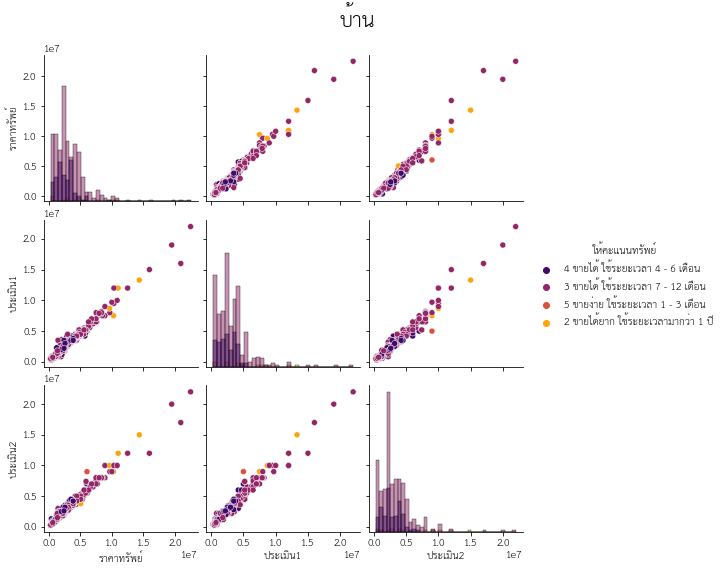

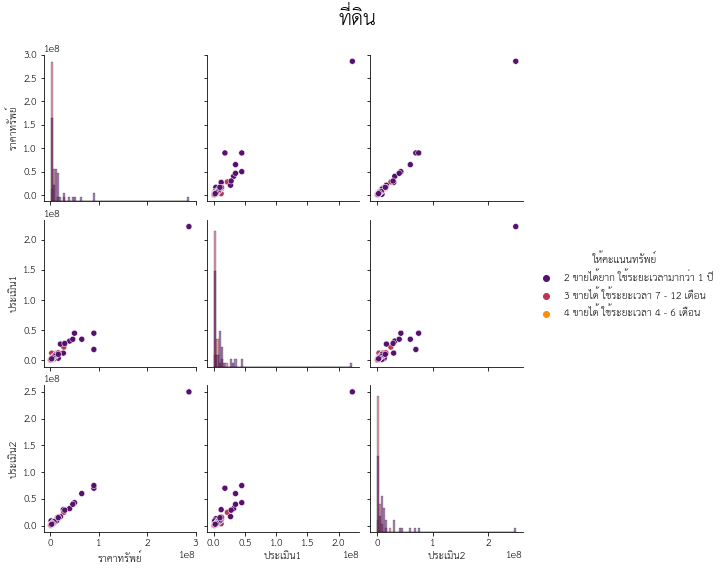

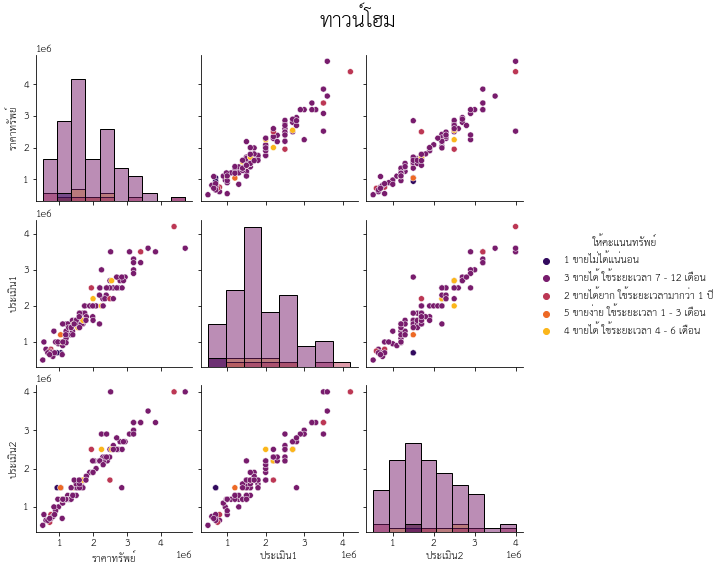

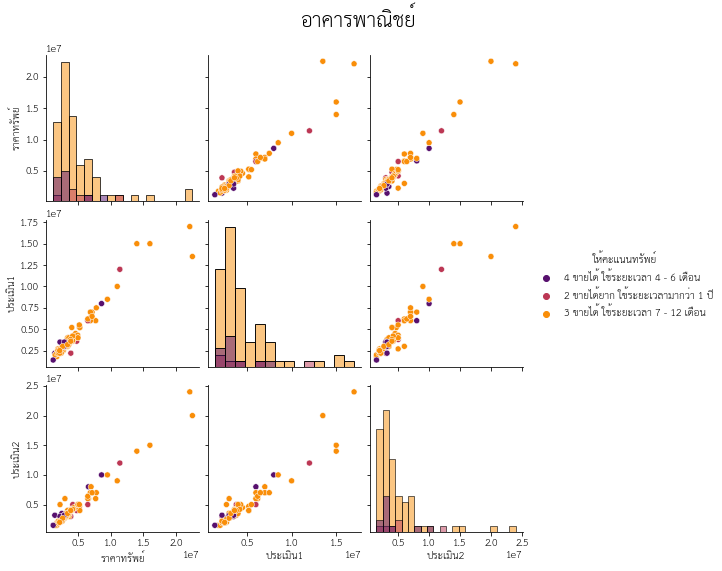

In [62]:
sns.pairplot(home, hue ="ให้คะแนนทรัพย์",palette = "inferno", diag_kind="hist")# ,kind='reg',plot_kws={'line_kws':{'color':'red'}} เพิ่มเส้นตรงที่เเดง reg
plt.suptitle("บ้าน",fontsize = 20 ,y = 1.05)


sns.pairplot(land, hue ="ให้คะแนนทรัพย์",palette = "inferno", diag_kind="hist")
plt.suptitle("ที่ดิน",fontsize = 20,y = 1.05 )


sns.pairplot(th, hue ="ให้คะแนนทรัพย์",palette = "inferno", diag_kind="hist")
plt.suptitle("ทาวน์โฮม",fontsize = 20,y = 1.05 )


sns.pairplot(b, hue ="ให้คะแนนทรัพย์",palette = "inferno", diag_kind="hist")
plt.suptitle("อาคารพาณิชย์",fontsize = 20,y = 1.05 )

plt.show();